# Dependencias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

import re
sns.set_theme()
import sys
import os
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import utileria as ut
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Planos factoriales

In [2]:
terms = [
    'bueno',       
    'bien',        
    'aceptable',   
    'adecuado',    
    'virtuoso',    
    'justo',       
    'está bien',   
    'genial',      
    'increíble',   
    'excepcional', 
    'significativo', 
    'mejor',       
    'ok',           
    'bien',         
    'malo',         
    'horrible',     
    'peor',         
    'terrible',     
    'horrible',
]


In [3]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,terms,2)

modelos.varianza_explicada()
modelos.componentes()

array([[ 3.7494898 , -2.2132802 ],
       [ 6.22034   , -3.4253669 ],
       [ 1.9704621 ,  1.969809  ],
       [ 1.7685732 ,  3.1530147 ],
       [ 0.01688404,  2.1217377 ],
       [ 3.673343  , -0.49092564],
       [ 5.2500296 , -1.9660513 ],
       [ 0.47052988,  2.7727787 ],
       [-1.5312434 ,  0.19315322],
       [-1.9418266 ,  8.387541  ],
       [ 1.5908754 ,  4.956797  ],
       [ 1.2118526 , -0.18922126],
       [ 3.0275474 , -1.394294  ],
       [ 6.2203393 , -3.425367  ],
       [-4.2652082 , -2.1137683 ],
       [-7.3267026 , -1.9544384 ],
       [-5.3472385 , -2.4812152 ],
       [-7.43134   , -1.9464633 ],
       [-7.3267045 , -1.9544388 ]], dtype=float32)

In [4]:
cluster = modelos.k_means(3)
cluster.labels_

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1])

In [5]:
cluster.cluster_centers_[0]

array([ 4.6901817, -2.1525476], dtype=float32)

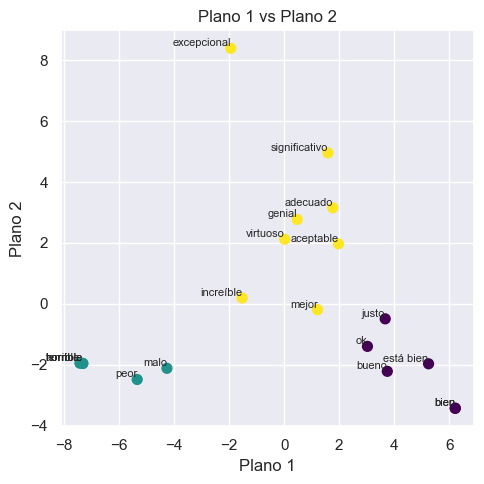

In [6]:
ut.graficos.plot_column_combinations(modelos.componentes(), cluster.labels_,terms)

In [7]:
with open('../input/palabras_vacias.txt', 'r') as file:
    stop_words = file.read().splitlines()

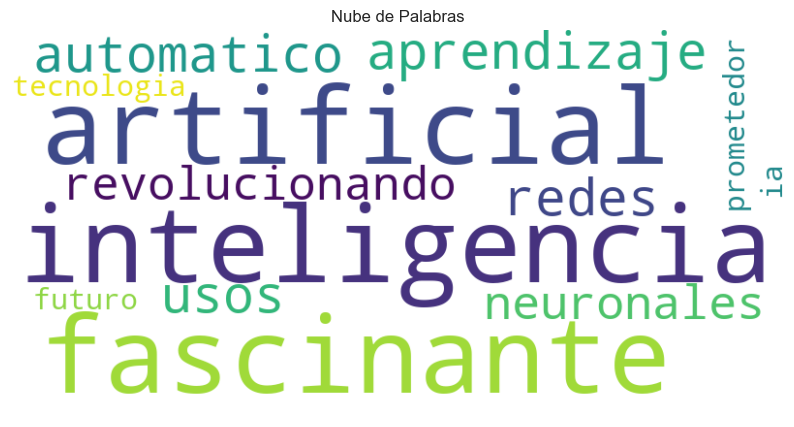

In [8]:
sentencias = [
    "La inteligencia artificial es fascinante.",
    "El aprendizaje automático tiene muchos usos.",
    "Las redes neuronales están revolucionando la tecnología.",
    "El futuro de la IA es prometedor."
]
sentencias = ut.limpieza_regex.limpieza_de_textos(sentencias=sentencias)
sentencias = ut.limpieza_regex.stop_words(stop_words,sentencias)
ut.graficos.generar_wordcloud(sentencias)


# analisis de sentimientos 

In [9]:
ut.analisis_sentimientos(terms)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, -1, -1, 0, -1, -1]

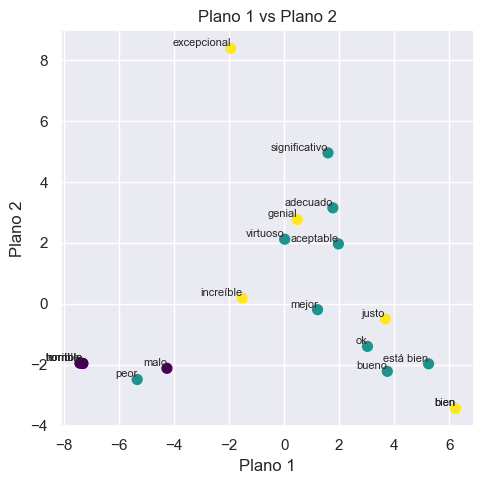

In [10]:
ut.graficos.plot_column_combinations(modelos.componentes(), ut.analisis_sentimientos(terms),terms)

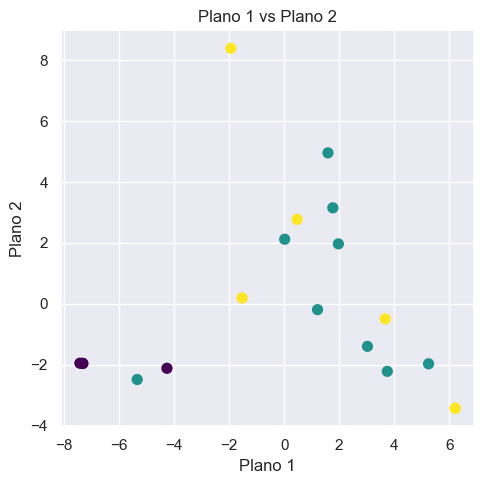

In [11]:
ut.graficos.plot_column_combinations(modelos.componentes(),colors=ut.analisis_sentimientos(terms))

# analisis de redes